# **Marriage Age Prediction**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('age_of_marriage_data.csv')
data.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [3]:
data.shape

(2567, 10)

## **Chack The Missing Velues**

In [4]:
data.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

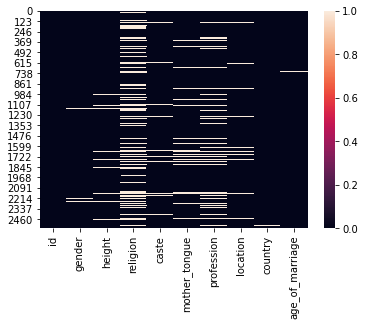

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

id                 0
gender             0
height             0
religion           0
caste              0
mother_tongue      0
profession         0
location           0
country            0
age_of_marriage    0
dtype: int64

In [7]:
data.shape

(1932, 10)

## **Feture Inginnering**

In [8]:
data.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0


In [9]:
data.drop(['id','profession','location'],axis='columns',inplace=True)

In [10]:
data.head()

,gender,height,religion,caste,mother_tongue,country,age_of_marriage
1,male,"5'7""",Jain,Shwetamber,Gujarati,USA,32.0
2,male,"5'7""",Hindu,Brahmin,Hindi,India,32.0
3,female,"5'0""",Hindu,Thakur,Hindi,India,30.0
4,male,"5'5""",Christian,Born Again,Malayalam,India,30.0
5,male,"5'5""",Hindu,Valmiki,Hindi,India,29.0


## **Encode The Catagorical Data**

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['religion'] = le.fit_transform(data['religion'])
data['caste'] = le.fit_transform(data['caste'])
data['mother_tongue'] = le.fit_transform(data['mother_tongue'])
data['country'] = le.fit_transform(data['country'])
data.head()

,gender,height,religion,caste,mother_tongue,country,age_of_marriage
1,1,"5'7""",2,34,6,19,32.0
2,1,"5'7""",1,14,8,5,32.0
3,0,"5'0""",1,36,8,5,30.0
4,1,"5'5""",0,13,13,5,30.0
5,1,"5'5""",1,38,8,5,29.0


In [12]:
def h_cm(h):
  return int(h.split('\'')[0])*30.48 +\
  int(h.split('\'')[1].replace('"',''))*2.54

In [13]:
data['height'] = data.height.apply(h_cm)

In [14]:
data.head()

,gender,height,religion,caste,mother_tongue,country,age_of_marriage
1,1,170.18,2,34,6,19,32.0
2,1,170.18,1,14,8,5,32.0
3,0,152.40,1,36,8,5,30.0
4,1,165.10,0,13,13,5,30.0
5,1,165.10,1,38,8,5,29.0


In [15]:
data['height_in_Cm'] = data['height'] 
data.drop('height',axis=1,inplace=True)

## **Split The Data**

In [16]:
X = data.drop('age_of_marriage',axis=1)
y = data['age_of_marriage']

In [17]:
print(X.head()) ,print(y.head())

   gender  religion  caste  mother_tongue  country  height_in_Cm
1       1         2     34              6       19        170.18
2       1         1     14              8        5        170.18
3       0         1     36              8        5        152.40
4       1         0     13             13        5        165.10
5       1         1     38              8        5        165.10
1    32.0
2    32.0
3    30.0
4    30.0
5    29.0
Name: age_of_marriage, dtype: float64


(None, None)

## **Feture Importence**

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [19]:
print(model.feature_importances_)

[0.02362195 0.04241709 0.27835201 0.16345467 0.07110328 0.42105101]


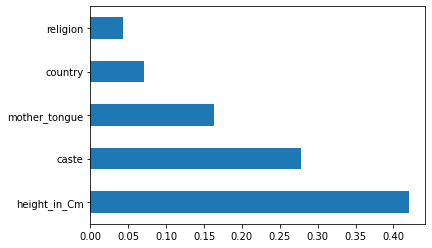

In [20]:
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

## **Train-Test splite** 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Simple Algoridhm Apply**

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 80,  max_depth=11)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.7016255505204889

## **Export The Model**

In [25]:
from sklearn.externals import joblib
joblib.dump(regressor,'marriage_Age_Prediction_model.ml')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['marriage_Age_Prediction_model.ml']

In [26]:
import pickle
filename = 'marriage_Age_Prediction_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))